# Data Exploration

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#AllstarFull = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AllstarFull.csv")
#Appearances = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Appearances.csv")
#AwardsManagers = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsManagers.csv")
#AwardsPlayers = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsPlayers.csv")
#AwardsShareManagers = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsShareManagers.csv")
#AwardsSharePlayers = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsSharePlayers.csv")
Batting = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv")
#BattingPost = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/BattingPost.csv")
#CollegePlaying = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/CollegePlaying.csv")
Fielding = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv")
#FieldingOF = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/FieldingOF.csv")
#FieldingOFsplit = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/FieldingOFsplit.csv")
#FieldingPost = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/FieldingPost.csv")
#HallOfFame = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/HallOfFame.csv")
#HomeGames = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/HomeGames.csv")
#Managers = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Managers.csv")
#ManagersHalf = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/ManagersHalf.csv")
Master = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Master.csv")
#Parks = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Parks.csv")
Pitching = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Pitching.csv")
#PitchingPost = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/PitchingPost.csv")
Salaries = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Salaries.csv")
#Schools = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Schools.csv")
#SeriesPost = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/SeriesPost.csv")
#Teams = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv")
#TeamsFranchises = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/TeamsFranchises.csv")
#TeamsHalf = pd.read_csv("http://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/TeamsHalf.csv")


#Varience in the years
The first stage of this analysis is how far back salaries appear to be comparable. It apparently that there will have been inflation since the 1985 season, but there may also be changes due to collective bargaining agreements, luxury taxes, the avalible pool of players, and the introduction of sabermetric decision making in contracts. 

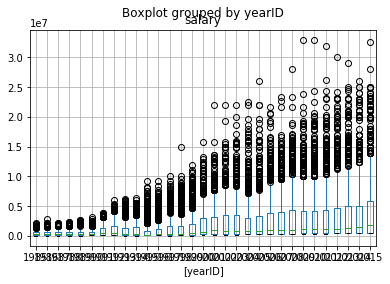

In [3]:
Salaries.boxplot(by = 'yearID')
plt.show()

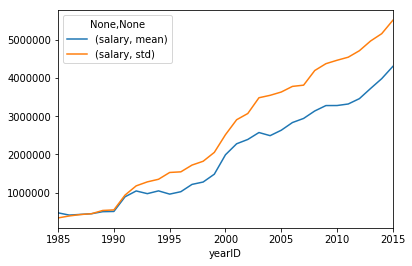

In [5]:
Salaries_YearID = Salaries.groupby('yearID')
# Salaries_YearID.describe() <- Too much data
Salaries_Stats = Salaries_YearID.agg([np.mean, np.std])
Salaries_Stats.plot()
plt.show()

Let's add more infomation into the analysis by merging in other tables
#Added
- Age
- Years Played
- Country of Birthy
- First and Last Names
- Weight
- Height
- Bat Hand 
- Throwing Hand

In [ ]:
Trim_Master = Master[['playerID','birthYear', 'birthCountry', 'nameFirst','nameLast', 'weight','height','bats','throws','debut']]
Salary_Analysis = Salaries.merge(Trim_Master,how='left', left_on='playerID', right_on='playerID')
Salary_Analysis['age'] = Salary_Analysis['yearID'] - Salary_Analysis['birthYear']
Salary_Analysis['debut'] = pd.to_datetime(Salary_Analysis['debut'])
Salary_Analysis['debutYear'] = pd.DatetimeIndex(Salary_Analysis['debut']).year
Salary_Analysis['yearsPlayed'] = Salary_Analysis['yearID'] - Salary_Analysis['debutYear']
Salary_Analysis = Salary_Analysis.drop(['birthYear', 'debut', 'debutYear'], axis=1)

I think I'm going to have to write loops for bringing in position.  Pitching should be straight-forward enough and pitching. 

In [ ]:
Salary_Analysis['Games Pitched'] = Salary_Analysis.merge()